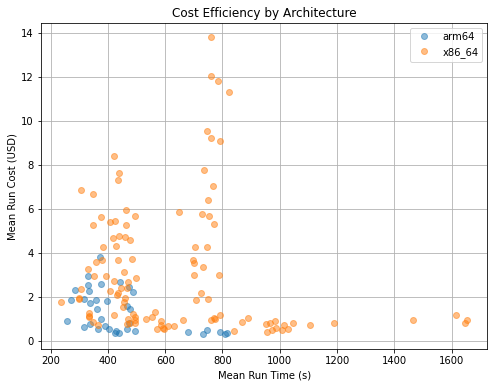

In [16]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: MIT-0

import matplotlib.pyplot as plt
import pandas as pd

path = '/Users/mrschre/bwa-benchmarks/benchmarks.tsv'
out_path = '/Users/mrschre/bwa-benchmarks/benchmarks_arch.png'
data = pd.read_csv(path, sep='\t')
groups = data.groupby('arch')


for name, group in groups:
    plt.plot(group["mean"], group["mean_cost"], marker="o", linestyle="", label=name, alpha=0.5)
plt.legend()
plt.xlabel('Mean Run Time (s)')
plt.ylabel('Mean Run Cost (USD)')
plt.grid(True)
plt.title('Cost Efficiency by Architecture')

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig(out_path, dpi=300)

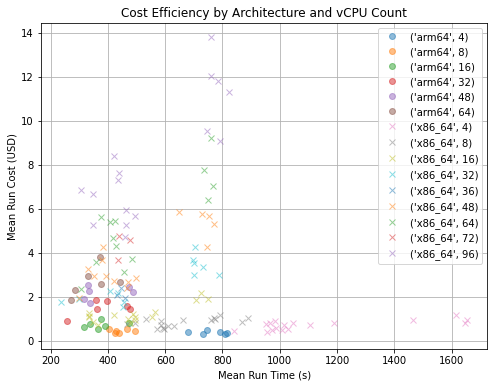

In [18]:
out_path = '/Users/mrschre/bwa-benchmarks/benchmarks_cpu.png'

groups = data.groupby(['arch','vcpu'])


for name, group in groups:
    marker = "o"
    arch = name[0]
    if arch == "x86_64":
        marker = "x"
    plt.plot(group["mean"], group["mean_cost"], marker=marker, linestyle="", label=name, alpha=0.5)
plt.legend()
plt.xlabel('Mean Run Time (s)')
plt.ylabel('Mean Run Cost (USD)')
plt.grid(True)
plt.title('Cost Efficiency by Architecture and vCPU Count')

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig(out_path, dpi=300)



In [ ]:
out_path = '/Users/mrschre/bwa-benchmarks/benchmarks_mem.png'

groups = data.groupby('ram_mb')
for name, group in groups:
    plt.plot(group["mean"], group["mean_cost"], marker="o", linestyle="", label=name, alpha=0.5)
plt.legend()
plt.xlabel('Mean Run Time (s)')
plt.ylabel('Mean Run Cost (USD)')
plt.grid(True)
plt.title('Cost Efficiency by RAM (MB)')

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig(out_path, dpi=300)

In [ ]:
out_path = '/Users/mrschre/bwa-benchmarks/benchmarks_instance_storage.png'

groups = data.groupby('instance_storage')
for name, group in groups:
    plt.plot(group["mean"], group["mean_cost"], marker="o", linestyle="", label=name, alpha=0.5)
plt.legend()
plt.xlabel('Mean Run Time (s)')
plt.ylabel('Mean Run Cost (USD)')
plt.grid(True)
plt.title('Cost Efficiency by Presence of Local Instance Storage')

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig(out_path, dpi=300)

In [ ]:
total_cost = sum(data['mean_cost'] * data['num_obs'])

In [ ]:
out_path = '/Users/mrschre/bwa-benchmarks/benchmarks_optimized_type.png'

data['optimization'] = data['instance_type'].str[0:2]

groups = data.groupby('optimization')
for name, group in groups:
    plt.plot(group["mean"], group["mean_cost"], marker="o", linestyle="", label=name, alpha=0.5)
plt.legend()
plt.xlabel('Mean Run Time (s)')
plt.ylabel('Mean Run Cost (USD)')
plt.grid(True)
plt.title('Cost Efficiency by Optimization Type')

figure = plt.gcf()
figure.set_size_inches(8, 6)
plt.savefig(out_path, dpi=300)